### Experimenting Optimized Trajectory with Acceleration Optimization

[ 0. -3.]
This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:     2349
Number of nonzeros in inequality constraint Jacobian.:     1080
Number of nonzeros in Lagrangian Hessian.............:     1800

Total number of variables............................:      546
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      369
Total number of inequality constraints...............:     1080
        inequality constraints with only lower bounds:      540
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      540

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 4.24e+00 6.79e-01  -1.0 0.00e+00    -  0.00e+00

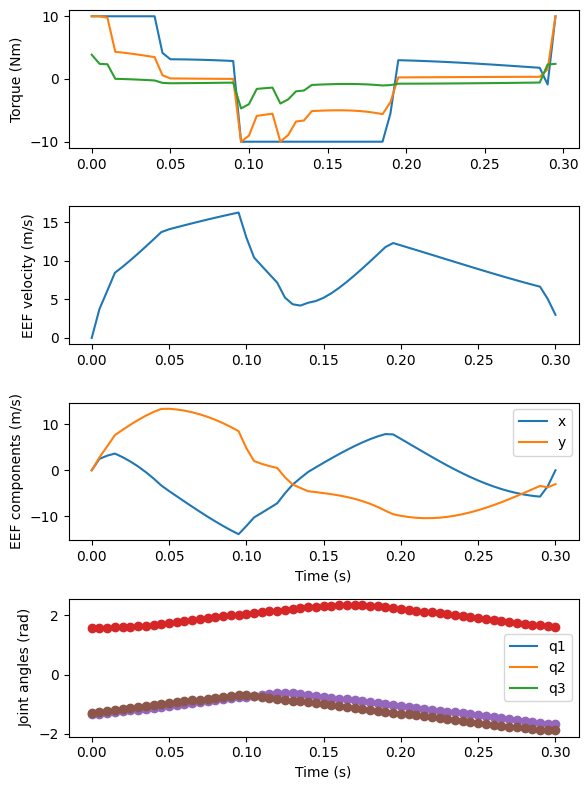

In [ ]:
import numpy as np
import casadi as cs
import matplotlib.pyplot as plt
import os
import robosuite.projects.impact_control.optimizing_gen3_arm

### Experimenting Time Optimal Trajectory with Acceleration Optimization

[ 0.  -0.5]

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:     1359
Number of nonzeros in inequality constraint Jacobian.:      542
Number of nonzeros in Lagrangian Hessian.............:     1350

Total number of variables............................:      277
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      189
Total number of 

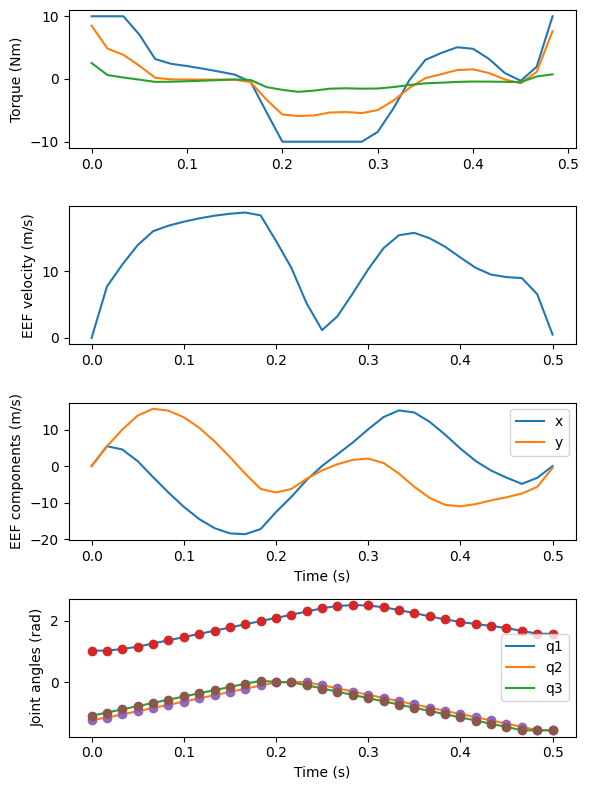

In [ ]:
import numpy as np
import casadi as cs
import matplotlib.pyplot as plt
import os
import robosuite.projects.impact_control.optimizing_max_jacobian as omj

# Arm parameters (example values)
m = [0.1/3, 0.1/3, 0.1/3]
l = [0.5, 0.5, 0.5]
r = [l[0]/20, l[1]/20, l[2]/20]

# Desired end-effector velocity (2D)
v_f = np.array([0.0, -0.5])
# optimize for only magnitude of velocity
# v_ee_mag_des = 11.0

# Initial conditions
q_f = np.array([np.pi*0.5, -np.pi*0.5, -np.pi*0.5])


# Bounds
q_lower = -4/5*np.pi * np.ones(3)
q_upper = 4/5*np.pi * np.ones(3)
dq_lower = -2*np.pi * np.ones(3)
dq_upper = 2*np.pi * np.ones(3)
tau_lower = -10*np.ones(3)
tau_upper = 10*np.ones(3)
t_lower = 0.1
t_upper = 0.5
t_init = 0.5

t_lower = 0.5
t_upper = 2.0
t_init = 1.0

# Time horizon and discretization steps
N = 30

print(v_f)
# Optimize the trajectory
solution = omj.time_optimal_trajectory_cartesian_accel(q_f, v_f, m, l, r,
                        q_lower, q_upper, dq_lower, dq_upper,
                        tau_lower, tau_upper, 
                        t_lower, t_upper,t_init,
                        N)
omj.display_and_save_solution(solution, 'time_opt_trajectory_max_cartesian_accel.npy')

### Experimenting Optimized Trajectory with Acceleration Optimization with Varying q_f

[ 0.  -0.5]
This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:     2361
Number of nonzeros in inequality constraint Jacobian.:     1440
Number of nonzeros in Lagrangian Hessian.............:     1800

Total number of variables............................:      546
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      367
Total number of inequality constraints...............:     1260
        inequality constraints with only lower bounds:      720
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      540

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.20e+00 1.98e+01  -1.0 0.00e+00    -  0.00e+

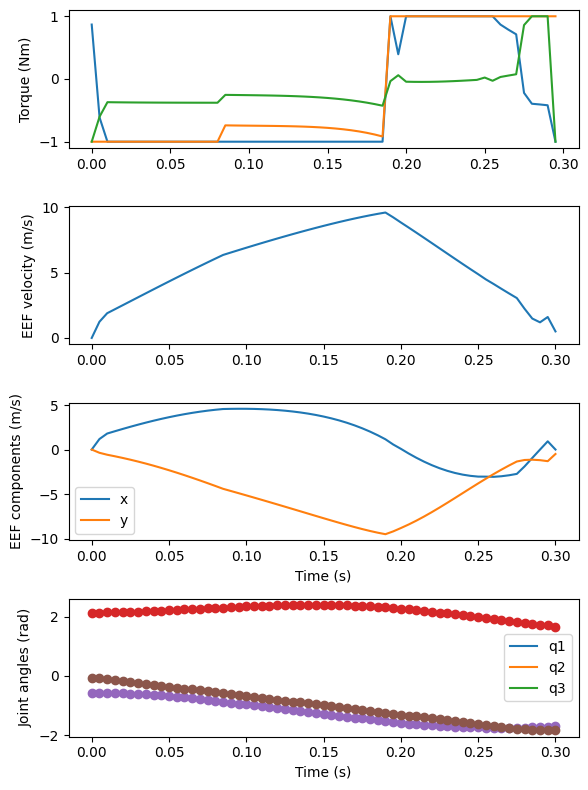

In [ ]:
import numpy as np
import casadi as cs
import matplotlib.pyplot as plt
import os
import robosuite.projects.impact_control.optimizing_max_jacobian as omj

# Arm parameters (example values)
m = [0.1/3, 0.1/3, 0.1/3]
l = [0.5, 0.5, 0.5]
r = [l[0]/20, l[1]/20, l[2]/20]

# Desired end-effector velocity (2D)
v_f = np.array([0.0, -0.5])
# optimize for only magnitude of velocity
# v_ee_mag_des = 11.0

# Initial conditions
# q_f = np.array([np.pi*0.5, -np.pi*0.5, -np.pi*0.5])
p_f = np.array([0.3,0.000])


# Bounds
q_lower = -4/5*np.pi * np.ones(3)
q_upper = 4/5*np.pi * np.ones(3)
dq_lower = -2*np.pi * np.ones(3)
dq_upper = 2*np.pi * np.ones(3)
tau_lower = -1*np.ones(3)
tau_upper = 1*np.ones(3)

# Time horizon and discretization steps
T = 0.3  # seconds
N = 60

print(v_f)
# Optimize the trajectory
solution = omj.optimize_trajectory_cartesian_accel_flex_pose(p_f, v_f, m, l, r,
                        q_lower, q_upper, dq_lower, dq_upper,
                        tau_lower, tau_upper,
                        T, N,
                        weight_v=1e-1, weight_xdd=1e-2,
                        weight_tau_smooth = 0, weight_terminal = 1e-3,
                        boundary_epsilon=1e-3)
omj.display_and_save_solution(solution, 'opt_trajectory_max_cartesian_accel_flex_pose.npy')




In [11]:
solution["q"].shape

(3, 61)

In [16]:
omj.end_effector_position(solution["q"][:,-1],solution["l"])

DM([0.3, 0])

In [19]:
import h5py
import pathlib

current_dir = pathlib.Path.cwd()
# Define the path to the HDF5 file
results_dir = "../results/2025-04-20_19-10-20"
hdf5_file = "collected_dataset_only_final_states.hdf5"
hdf5_path = os.path.join(current_dir, results_dir, hdf5_file)

# Read the v_f_des from run_729
with h5py.File(hdf5_path, 'r') as f:
    v_f_des = f['run_729']['v_f_des'][:]
    print(f"Desired final velocity from run_729: {v_f_des}")

# Optional: also get actual impact velocity for comparison
    v_f_act = f['run_729']['v_f_act'][:]
    print(f"Actual impact velocity from run_729: {v_f_act}")

Desired final velocity from run_729: [-0.05555556 -0.5       ]
Actual impact velocity from run_729: [ 0.77560802 -0.08625326]


### Inspecting Optimized Trajectory with Acceleration Optimization with Varying q_f

In [ ]:
import numpy as np
import casadi as cs
import matplotlib.pyplot as plt
import os
import robosuite.projects.impact_control.optimizing_max_jacobian as omj
import h5py
import pathlib
import robosuite.scripts.impact_ctrl_data_visualization_pf_vf as vis

current_dir = pathlib.Path.cwd()  # for ipython notebook
# current_dir = os.path.dirname(os.path.abspath(__file__))
# Define the path to the HDF5 file
# results_dir = "../results/2025-04-20_19-10-20"
# results_dir = "../results/2025-04-22_15-21-35"
results_dir = "../results/2025-04-29_21-42-32"
hdf5_file = "collected_dataset_only_final_states.hdf5"
hdf5_path = os.path.join(current_dir, results_dir, hdf5_file)
# vis.plot_impact_errors(hdf5_path)

# Read the v_f_des from run_729
# run_id = "0729"
# run_id = "0319"
run_id = "1024"
with h5py.File(hdf5_path, 'r') as f:
    v_f_des = f[f'run_{run_id}']['v_f_des'][:]
    print(f"Desired final velocity from run_{run_id}: {v_f_des}")

# Optional: also get actual impact velocity for comparison
    v_f_act = f[f'run_{run_id}']['v_f_act'][:]
    print(f"Actual impact velocity from run_{run_id}: {v_f_act}")


# Arm parameters (example values)
m = [0.1/3, 0.1/3, 0.1/3]
l = [0.5, 0.5, 0.5]
r = [l[0]/20, l[1]/20, l[2]/20]

# Desired end-effector velocity (2D)
v_f = v_f_des

# Bounds
q_lower = -4/5*np.pi * np.ones(3)
q_upper = 4/5*np.pi * np.ones(3)
dq_lower = -2*np.pi * np.ones(3)
dq_upper = 2*np.pi * np.ones(3)
tau_lower = -10*np.ones(3)
tau_upper = 10*np.ones(3)

# Time horizon and discretization steps
T = 0.5  # seconds
N = 60

# Initialize an empty list to store the results
results = []

for i in range(30):
    # Generate a random q_f within the bounds
    q_f = np.random.uniform(q_lower, q_upper)
    try:
        # Optimize the trajectory
        solution = omj.optimize_trajectory_cartesian_accel(q_f, v_f, m, l, r,
                                q_lower, q_upper, dq_lower, dq_upper,
                                tau_lower, tau_upper,
                                T, N,
                                weight_v=1e-2, weight_xdd=1e-5,
                                weight_tau_smooth = 0, weight_terminal = 1e-3)
        
        # Store the result if optimization was successful
        if solution['stats']['success']:
            results.append({'q_f': q_f, 'solution': solution})
            print(f"Iteration {i}: Optimization successful with q_f = {q_f}")
        else:
            print(f"Iteration {i}: Optimization failed with q_f = {q_f}")
    except Exception as e:
        print(f"Iteration {i}: Exception occurred with q_f = {q_f}: {e}")

print(f"Total successful optimizations: {len(results)}")

# Now you can analyze the results
if results:
    best_result = min(results, key=lambda x: x['solution']['f'])
    print(f"Best solution has objective value: {best_result['solution']['f']}")
    print(f"Best q_f: {best_result['q_f']}")
    
    # You can also display and save the best solution
    omj.display_and_save_solution(best_result['solution'], 'best_opt_trajectory_max_cartesian_accel.npy')

Desired final velocity from run_0729: [-0.05555556 -0.5       ]
Desired final position from run_0729: [0.61111111 0.        ]

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  |  29.05ms (226.96us)  28.86ms (225.48us)       128
       nlp_g  |  40.27ms (314.59us)  39.95ms (312.12us)       128
  nlp_grad_f  |  80.56ms (  1.12ms)  80.25ms (  1.11ms)        72
  nlp_hess_l  |   1.32 s ( 18.89ms)   1.32 s ( 18.79ms)        70
   nlp_jac_g  | 233.04ms (  3.15ms) 232.26ms (  3.14ms)        74
       total  |   2.08 s (  2.08 s)   2.07 s (  2.07 s)         1


The descrapancy came from the small moment when the arm hasn't achieved the surface at t_f, the miss alignment can potentially be fixed using no angular vel at the end constraint.

In [4]:
p_f_opt = omj.end_effector_position(solution["q"][:,-1],solution["l"])
print(f"Optimized final position: {p_f_opt}")
J_f = omj.compute_jacobian(solution["q"][:,-1], solution["l"])
v_f_opt = J_f @ solution["dq"][:,-1]
print(f"Optimized final velocity: {v_f_opt}")

Optimized final position: [0.344444, -5.55112e-17]
Optimized final velocity: [-0.0777778, -0.5]


The optimization result is correct, where did the discrepancy came from?

In [2]:
sol_id = f"sol_{run_id}.npy"
solution_path = os.path.join(current_dir, results_dir, sol_id)
print(f"Solution saved to {solution_path}")
opt_trajectory_data = np.load(solution_path, allow_pickle=True).item()
T_opt = opt_trajectory_data['T_opt']
U_opt = opt_trajectory_data['U_opt']
Z_opt = opt_trajectory_data['Z_opt']
q_opt = Z_opt[:3, :]
dq_opt = Z_opt[3:, :]
p_f_opt = omj.end_effector_position(q_opt[:,-1],l)
print(f"Optimized final position: {p_f_opt}")
J_f = omj.compute_jacobian(q_opt[:,-1], l)
v_f_opt = J_f @ dq_opt[:,-1]
print(f"Optimized final velocity: {v_f_opt}")

Solution saved to /home/ckong35/workspaces/robosuite/robosuite/demos/../results/2025-04-20_19-10-20/sol_999.npy
Optimized final position: [0.7, 5.55112e-17]
Optimized final velocity: [0.1, -0.5]


In [3]:
U_opt[:,-1]

array([0., 0., 0.])